In [10]:
install.packages("tidyverse")
install.packages("rpart")
install.packages("rpart.plot")
install.packages("kknn")
install.packages("neuralnet")
install.packages("e1071")

library(tidyverse)
library(rpart)
library(rpart.plot)
library(kknn)
library(neuralnet)
library(e1071)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

also installing the dependency ‘Deriv’


Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)


Attaching package: ‘neuralnet’


The following object is masked from ‘package:dplyr’:

    compute




In [11]:
train=read.csv('bike_rental_train.csv')
test=read.csv('bike_rental_test.csv')

[1] 182.0101


[1] 155.1006

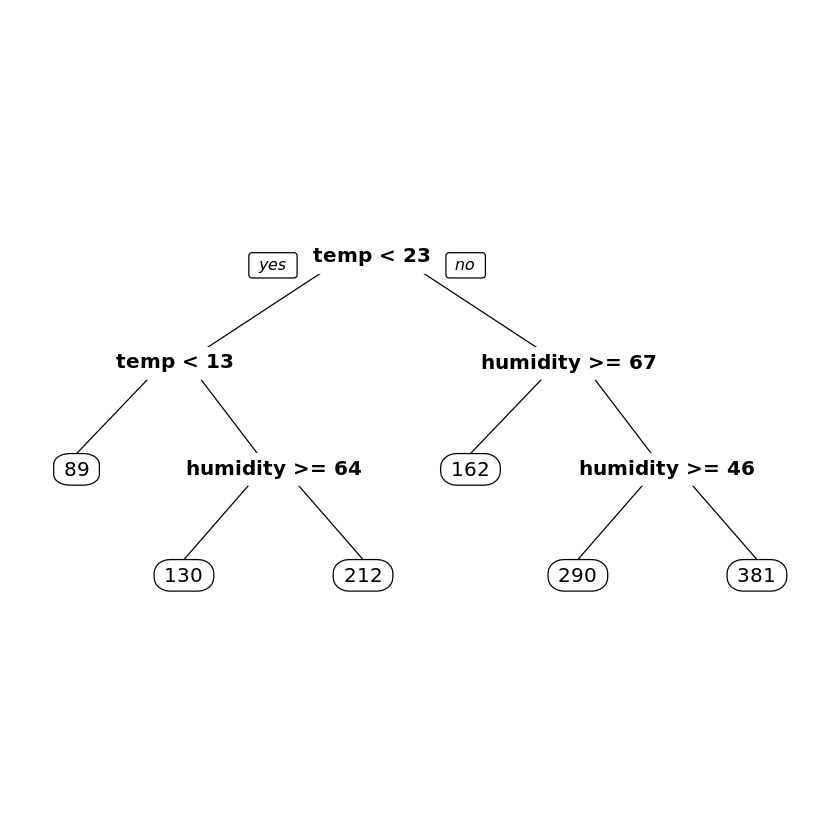

In [12]:
#question 2-4
rmse = sqrt(mean((mean(train$bike_rent_count)-test$bike_rent_count)^2))
print(rmse)
model.Dtree <- rpart(bike_rent_count~., data = train, method="anova")
prp(model.Dtree)
pred.Dtree <- predict(model.Dtree, newdata=test)
err.Dtree <- (test$bike_rent_count - pred.Dtree)^2
rmse.Dtree <- sqrt(mean(err.Dtree))
rmse.Dtree

In [13]:
#question 5-6
model.MLR <- lm(bike_rent_count ~., data=train)
summary(model.MLR)
predictions <- predict(model.MLR, newdata=test)
errors <- test$bike_rent_count - predictions 
rmse <- sqrt(mean((errors^2)))
rmse


Call:
lm(formula = bike_rent_count ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-329.62 -102.84  -32.72   67.26  707.22 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 176.50655    8.33024  21.189   <2e-16 ***
temp          8.73939    0.20541  42.547   <2e-16 ***
humidity     -2.68049    0.08747 -30.646   <2e-16 ***
windspeed     0.30852    0.20603   1.497    0.134    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 158 on 9797 degrees of freedom
Multiple R-squared:  0.2386,	Adjusted R-squared:  0.2383 
F-statistic:  1023 on 3 and 9797 DF,  p-value: < 2.2e-16


[1] 155.967

In [14]:
#question 7
model.MLR <- lm(bike_rent_count ~temp+humidity, data=train)
predictions <- predict(model.MLR, newdata=test[c(1,2)])
errors <- test$bike_rent_count - predictions 
rmse <- sqrt(mean((errors^2)))
rmse

[1] 156.0507

In [15]:
#question 8
model.KNN <- kknn(bike_rent_count~., train, test, k=5, distance = 2, scale=FALSE)
pred.KNN <- predict(model.KNN, newdata=test)
err.KNN <- test$bike_rent_count - pred.KNN 
rmse.KNN <- sqrt(mean((err.KNN^2)))
rmse.KNN

[1] 166.461

In [16]:
#question 9
model.KNN <- kknn(bike_rent_count~., train, test, k=3, distance = 2, scale=FALSE)
pred.KNN <- predict(model.KNN, newdata=test)
err.KNN <- test$bike_rent_count - pred.KNN 
rmse.KNN <- sqrt(mean((err.KNN^2)))
rmse.KNN

[1] 174.0458

[1] 5
Nueral Network RMSE: 157.4874

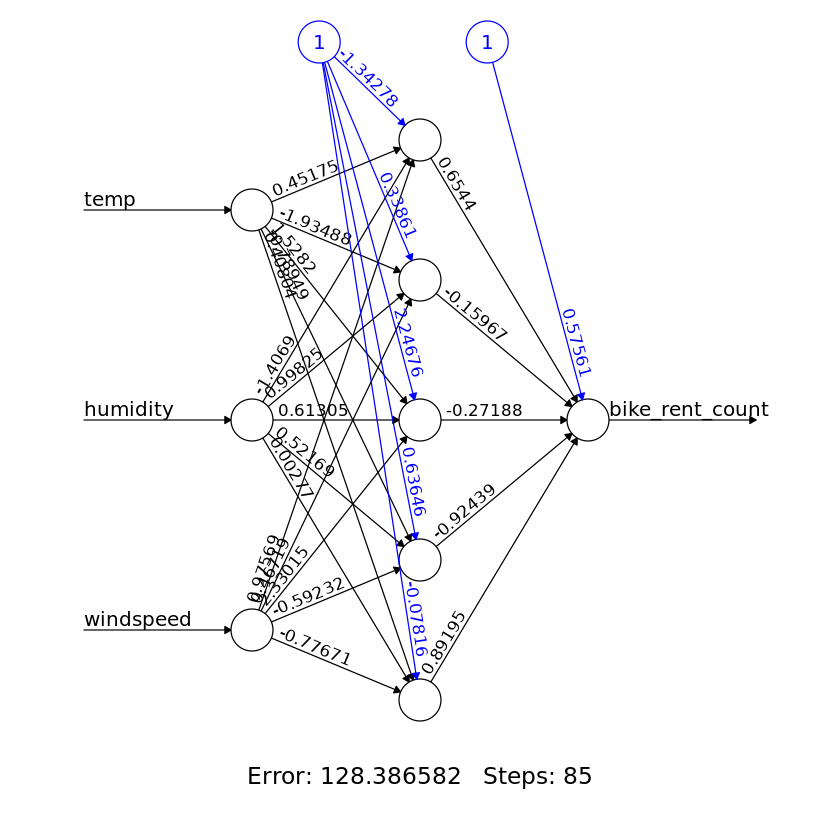

[1] 10
Nueral Network RMSE: 154.5469

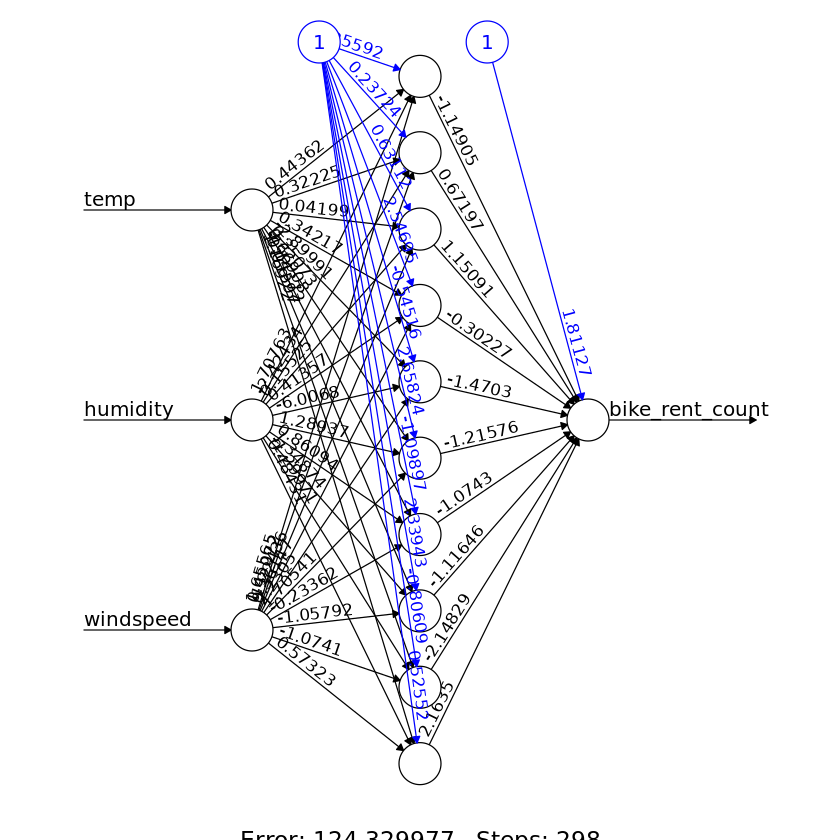

[1] 50
Nueral Network RMSE: 153.9536

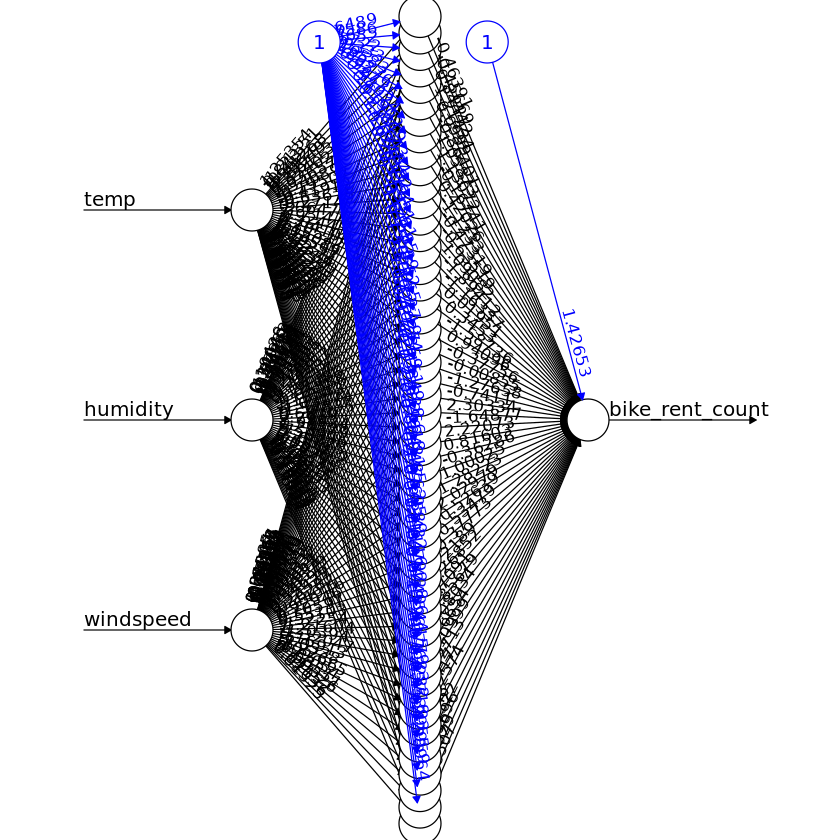

[1] 100
Nueral Network RMSE: 153.989

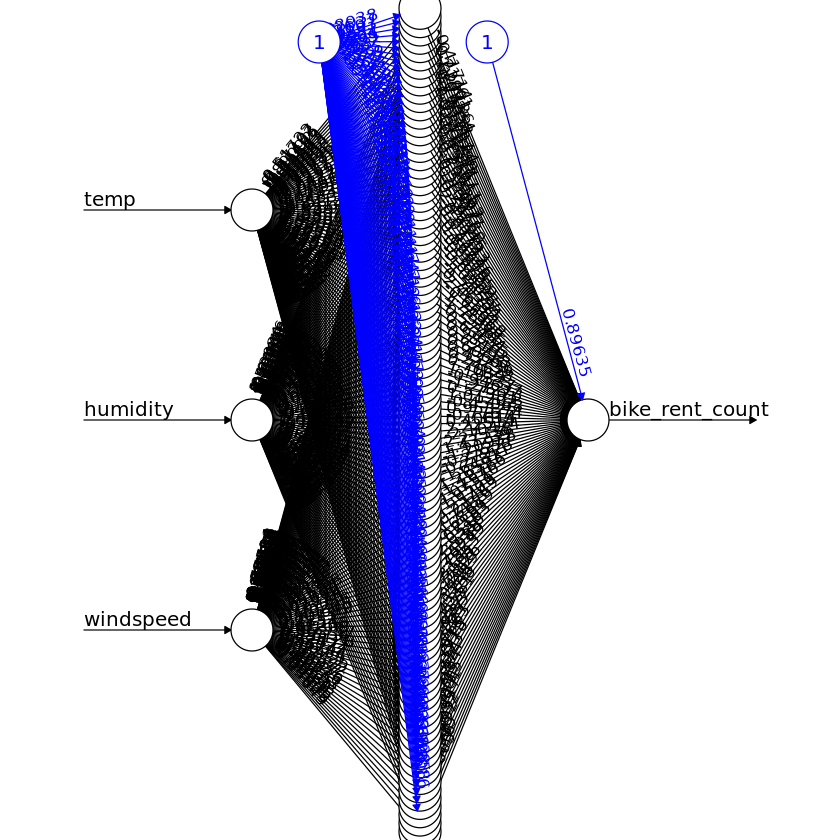

In [31]:
#question 10
train_scaled <- train %>%
  mutate_all(function(x){(x - min(x)) / (max(x) - min(x))})

test_scaled <- test %>%
  mutate_all(function(x){(x - min(x)) / (max(x) - min(x))})

net <- function(x){
        nn <- neuralnet(bike_rent_count~.
                    , data=train_scaled
                    , hidden=c(x) ,err.fct = "sse",threshold = 1, learningrate=.05, rep = 1
                    , linear.output=TRUE)
    plot(nn, rep="best")
    pred.nn <- predict(nn, newdata=test_scaled)
    new_pred=c()
    for(i in pred.nn){
      new_pred=c(new_pred,i*(max(test$bike_rent_count) - min(test$bike_rent_count))+min(test$bike_rent_count))
    }
    err.nn <- test$bike_rent_count - new_pred 
    rmse.nn <- sqrt(mean((err.nn^2)))
    print(x)
    cat("Nueral Network RMSE:", rmse.nn)
}

net(5)
net(10)
net(50)
net(100)

In [30]:
#question 11
model.SVR <- svm(bike_rent_count~., train)
pred.SVR <- predict(model.SVR, newdata=test)
err.SVR <- test$bike_rent_count - pred.SVR 
rmse.SVR <- sqrt(mean((err.SVR^2)))
rmse.SVR

[1] 154.427